# WeRateDogs Project Udacity: Wrangling and Analysis
* Data collected from Twitter

### (Rishabh Varma)
### Sept 8th, 2019

### Importing Libraries:

In [80]:
## Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sb
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import os
import re

%matplotlib inline

## 1. Gathering Data:

#### Gathering data from the given file:

In [2]:
archive = pd.read_csv('twitter-archive-enhanced-2.csv')
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Getting the Image Prediction File programatically:

In [91]:
## Thecontent is loaded into the respone:

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

## This saves the file, but not in memory:

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [92]:
## Now, we bring the file into memory:

prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
prediction.shape

(2075, 12)

#### Now we get the 'Retweet' and the 'Likes' from the Twitter API:

In [13]:
# Twitter API keys and Access tokens
consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

In [10]:
# Twitter API keys and Access tokens
consumer_key = '4wIFoXo-----p3MOEEr0t'
consumer_secret = 'zlxsE9Tv-------B5OlJENZCbREvLAWoBZT8eqMV1DTOeW'
access_token = '9032687521-------rWVLc8iNHF9oieLOTcXqi805MNQzG0'
access_secret = 'Nigx--------NB48KiXRqQTqfCN5o13ExmTfAbw'

In [11]:
## Setting up the API access:

access = tweepy.OAuthHandler(consumer_key, consumer_secret)
access.set_access_token(access_token, access_secret)

api = tweepy.API(access, wait_on_rate_limit=True)
api

## Reference: https://stackoverflow.com/questions/44581647/retrieving-a-list-of-tweets-using-tweet-id-in-tweepy

In [12]:
### We will create a For loop to place every Tweet's JSON data into the file 'tweet_json.txt':

with open('tweet_json.txt', 'w', encoding='utf-8') as file:
    for tweet_id in archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue
            
## Reference: https://stackoverflow.com/questions/44462205/reading-json-stored-in-txt-file-with-python
## Reference: https://stackabuse.com/saving-text-json-and-csv-to-a-file-in-python/

In [67]:
 # Append each tweet page into a list
    
tweets_detail = []
file = open('tweet_json.txt', 'r')
for line in file:
    try:
        tweet = json.loads(line) ## Creates a dictionary for Individual Id.
        tweets_detail.append(tweet) ## Appends 'each' of the dictionary into a 'list'
    except:
        continue

file.close()

### Reference: https://docs.python.org/3/library/json.html

In [68]:
## Creating a Data Frame that contains the 'retweet' and the 'favorite' count details.

retweet_favorite = pd.DataFrame()

def tweet_id(tweet):
    return tweet['id'] ### Calling the individual 'Key = 'id'' for individual 'Dictionaries (tweet)'

def tweet_retweet(tweet):
    return tweet['retweet_count']

def tweet_favorite(tweet):
    return tweet['favorite_count']

## We will Call 'Required' KEY (id, retweet_count, favorite_count) for Individual Dictionary (tweet)
## And Iterate it over the Entire 'List' of Dictionaries (tweets_data)
## Save the result in the form of a List and then to the Data Frame.

retweet_favorite['tweet_id'] = list(map(tweet_id, tweets_detail))
retweet_favorite['retweet_count'] = list(map(tweet_retweet, tweets_detail))
retweet_favorite['favorite_count'] = list(map(tweet_favorite, tweets_detail))

retweet_favorite.head()

### Reference: https://www.w3schools.com/python/ref_func_map.asp

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7947,37150
1,892177421306343426,5901,31950
2,891815181378084864,3902,24066
3,891689557279858688,8092,40467
4,891327558926688256,8784,38701


#### Merging the Three Dat Frames into one for further assessment:

In [75]:
### Joining 'archieve' and 'retweet_favorite' first:

data_frame_1 = pd.merge(archive, retweet_favorite, how = 'left', on =['tweet_id', 'tweet_id'])

## Final Dataset:

twitter_dog = pd.merge(data_frame_1, prediction, how = 'left', on =['tweet_id', 'tweet_id'])
twitter_dog.head(2)

In [90]:
## Downloading the Data Frame for future use:

twitter_dog.to_csv('twitter_dog.csv', index = False)

In [210]:
## Loading the file for the next stage:

twitter_dog = pd.read_csv('twitter_dog.csv')

## 2. Accessing the Data:

In [211]:
twitter_dog.info()
twitter_dog.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


#### Looking at the missing values in the 'Stage the Dog is in'.

In [26]:
twitter_dog['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [27]:
twitter_dog['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [28]:
twitter_dog['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

#### Getting the Rows where prediction made in 'p1, p2, p3' about the dogs is 'False'


In [29]:
not_dog = twitter_dog[((twitter_dog['p1_dog'] == 0) & (twitter_dog['p2_dog'] == 0) & (twitter_dog['p3_dog'] == 0)) == 1]

In [30]:
not_dog.shape[0]

324

#### Getting the Ratings detail for the two different rating columns:

In [31]:
twitter_dog.rating_denominator.value_counts().head(10)

10    2333
11       3
50       3
80       2
20       2
2        1
16       1
40       1
70       1
15       1
Name: rating_denominator, dtype: int64

In [32]:
twitter_dog.rating_numerator.value_counts().head(10)

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
Name: rating_numerator, dtype: int64

#### Getting the names of the dogs:

In [33]:
twitter_dog['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

### Quality:

* 'timestamp' needs to be inthe "datetime" format. Currently it is not.
* 'tweet_id' should be in the 'string' format than in the current 'integer' format.
* Some rating are wrong in the dataset. Need to look at the 'rating_numerator' and the 'rating_denominator' as there are very few ratings above 15 in the former.
* 'in_reply_to_status_id, in_reply_to_user_id, and retweeted_status_timestamp' have a lot of missing values.
* Some of the dog's name in the 'name' column are not Name. They need to be replaced with 'NaN'.
* There are three columns that provide predictions to the breed of the dog. Need to find a way to make all of these columns provide better quality data.
* The column 'timestamp' provides no particular information that can be used for analysis. We will extract few data from it in the cleaning stage
* There are retweets presentin the data set. We only need the original ratings.


### Tidyness:

* There are 4 columns for the Dog Stages. This violates the rule of Tidy Data. So 'floofer, pupper, puppo, and doggo' need to be combined in to one column.
* Rating numerator and denominator columns should be just one column.
* Needed, but already done. Combining all the 3 datset into one. I have already done that.

## 3. Cleaning Data:

In [212]:
## We will start by making a copy of the file:

twitter_dog_1 = twitter_dog.copy()

#### Quality Issue 1:
* Data type problem for the 'timestamp' column:
* We will change the Datatype of this column

In [213]:
twitter_dog_1.timestamp = pd.to_datetime(twitter_dog_1.timestamp)

 * Test

In [214]:
twitter_dog_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count      

#### Quality Issue 2:
* Data type conversion of 'tweet_id' to string:
* Data type conversion of 'retweet_count' and 'favorite_count':
* We will change the datatype of these columns

In [215]:
twitter_dog_1.tweet_id = twitter_dog_1.tweet_id.astype(str)

In [216]:
## Converting all the Null values in the 'retweet_count' and the 'favorite_count' to 0:
twitter_dog_1[['retweet_count', 'favorite_count']] = twitter_dog_1[['retweet_count','favorite_count']].fillna(value= 0)

twitter_dog_1['retweet_count']=twitter_dog_1['retweet_count'].astype(int)
twitter_dog_1['favorite_count']=twitter_dog_1['favorite_count'].astype(int)

* Test

In [217]:
twitter_dog_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count     

#### Tidyness Issue 3:
* Some ratings are wrong:
> * We will drop the rating that are the outliers
> * We will try and fill in the ratings for any missing rating
> * We will then find out the 'decimal ratings' for the 'Numerator ratings' and fix them with constant values
> * Create a Unique column for Overall rating (Ratio of Numerator to Denominatorrating)

In [218]:
### 'Numerator' ratings tends to spread from 1 to 15 in most of the cases, while 'Denominator' rating are mostly 10.

### PART 1: We will first eliminate any rating that is 'Greater than 10' in' Denominator'

twitter_dog_1.loc[twitter_dog_1.rating_denominator > 10,['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
342,832088576586297345,11,15
433,820690176645140481,84,70
784,775096608509886464,9,11
902,758467244762497024,165,150
1068,740373189193256964,9,11
1120,731156023742988288,204,170
1165,722974582966214656,4,20
1202,716439118184652801,50,50
1228,713900603437621249,99,90
1254,710658690886586372,80,80


In [219]:
### Dropping rows with 'Denominator' rating > 10

twitter_dog_1.drop(labels=[342, 433, 784, 902, 1068, 1120, 1165, 1202, 1228, 1254, 1274,
                     1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843],
                     axis = 0, inplace = True)

In [220]:
### PART 2: Change any rating to 10 that is 'Less than 10' in the 'Denominator'

twitter_dog_1.loc[twitter_dog_1.rating_denominator < 10,['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
313,835246439529840640,960,0
516,810984652412424192,24,7
2335,666287406224695296,1,2


In [221]:
### Changing all the rating less than 10 to 10:

twitter_dog_1.loc[twitter_dog_1.tweet_id == '835246439529840640','rating_denominator'] = [10]
twitter_dog_1.loc[twitter_dog_1.tweet_id == '810984652412424192','rating_denominator'] = [10]
twitter_dog_1.loc[twitter_dog_1.tweet_id == '666287406224695296', 'rating_denominator'] = [10]

In [222]:
### Check:

twitter_dog_1.loc[twitter_dog_1.rating_denominator != 10,['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator


In [224]:
## PART 3: We will now check for any Decimal values for the Numerator rating:

twitter_dog_1['rating_numerator'] = twitter_dog_1.text.str.extract('(\d[.,]?\d+)')
twitter_dog_1['rating_numerator'].unique()

array(['13', '12', '14', '17', '150', '11', '2195', '10', '420', '666',
       '98', '236', '60', '15', '182', '2016', '960', '9.75', '007', '24',
       '46', '100', '50', '987', '2002', '1776', '2.0', '31', '47', '400',
       '80', '33', '97', '61', '260', '2015', '9.5', '92', '85', '22',
       '2003', '8.98', '1949'], dtype=object)

In [225]:
## Changing the decimal values of the Numerator ratings to proper integer:

### PART 3A: Locating tweet_id's for the numerators rating under scan:

twitter_dog_1[(twitter_dog_1['rating_numerator'] == '9.75') |
              (twitter_dog_1['rating_numerator'] == '150') |
              (twitter_dog_1['rating_numerator'] == '420') |
              (twitter_dog_1['rating_numerator'] == '236') |
              (twitter_dog_1['rating_numerator'] == '182') |
              (twitter_dog_1['rating_numerator'] == '960') |
              (twitter_dog_1['rating_numerator'] == '100') |
              (twitter_dog_1['rating_numerator'] == '260') |
              (twitter_dog_1['rating_numerator'] == '400') |
              (twitter_dog_1['rating_numerator'] == '007') |
              (twitter_dog_1['rating_numerator'] == '666') |
              (twitter_dog_1['rating_numerator'] == '987') |
              (twitter_dog_1['rating_numerator'] == '2002') |
              (twitter_dog_1['rating_numerator'] == '1776') |
              (twitter_dog_1['rating_numerator'] == '2195') |
              (twitter_dog_1['rating_numerator'] == '2.0') |
              (twitter_dog_1['rating_numerator'] == '2015') |
              (twitter_dog_1['rating_numerator'] == '9.5') |
              (twitter_dog_1['rating_numerator'] == '1949') |
              (twitter_dog_1['rating_numerator'] == '8.98') |
              (twitter_dog_1['rating_numerator'] == '2003')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
57,881268444196462592,NaN,NaN,2017-07-01 21:49:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881268444...,...,1.0,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,1.0,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844979544...,...,3.0,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,...,1.0,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


In [226]:
### PART 3B: Replacing the rating in the Numerator column: We will provide them the value of 10, 11, 12 randomly for each one of them.

twitter_dog_1.loc[twitter_dog_1.tweet_id == '881268444196462592', 'rating_numerator'] = 12
twitter_dog_1.loc[twitter_dog_1.tweet_id == '681340665377193984', 'rating_numerator'] = 12
twitter_dog_1.loc[twitter_dog_1.tweet_id == '670842764863651840', 'rating_numerator'] = 11
twitter_dog_1.loc[twitter_dog_1.tweet_id == '670408998013820928', 'rating_numerator'] = 10
twitter_dog_1.loc[twitter_dog_1.tweet_id == '669006782128353280', 'rating_numerator'] = 11
twitter_dog_1.loc[twitter_dog_1.tweet_id == '666057090499244032', 'rating_numerator'] = 12
twitter_dog_1.loc[twitter_dog_1.tweet_id == '666049248165822465', 'rating_numerator'] = 10
twitter_dog_1.loc[twitter_dog_1.tweet_id == '877611172832227328', 'rating_numerator'] = 12
twitter_dog_1.loc[twitter_dog_1.tweet_id == '855862651834028034', 'rating_numerator'] = 11
twitter_dog_1.loc[twitter_dog_1.tweet_id == '855860136149123072', 'rating_numerator'] = 10
twitter_dog_1.loc[twitter_dog_1.tweet_id == '844979544864018432', 'rating_numerator'] = 11
twitter_dog_1.loc[twitter_dog_1.tweet_id == '838150277551247360', 'rating_numerator'] = 12
twitter_dog_1.loc[twitter_dog_1.tweet_id == '835246439529840640', 'rating_numerator'] = 10
twitter_dog_1.loc[twitter_dog_1.tweet_id == '832215909146226688', 'rating_numerator'] = 12
twitter_dog_1.loc[twitter_dog_1.tweet_id == '826598799820865537', 'rating_numerator'] = 11
twitter_dog_1.loc[twitter_dog_1.tweet_id == '786709082849828864', 'rating_numerator'] = 10
twitter_dog_1.loc[twitter_dog_1.tweet_id == '766793450729734144', 'rating_numerator'] = 11
twitter_dog_1.loc[twitter_dog_1.tweet_id == '757597904299253760', 'rating_numerator'] = 12
twitter_dog_1.loc[twitter_dog_1.tweet_id == '750086836815486976', 'rating_numerator'] = 10
twitter_dog_1.loc[twitter_dog_1.tweet_id == '749981277374128128', 'rating_numerator'] = 12
twitter_dog_1.loc[twitter_dog_1.tweet_id == '746818907684614144', 'rating_numerator'] = 11
twitter_dog_1.loc[twitter_dog_1.tweet_id == '708469915515297792', 'rating_numerator'] = 10
twitter_dog_1.loc[twitter_dog_1.tweet_id == '683773439333797890', 'rating_numerator'] = 11
twitter_dog_1.loc[twitter_dog_1.tweet_id == '683030066213818368', 'rating_numerator'] = 12
twitter_dog_1.loc[twitter_dog_1.tweet_id == '682662431982772225', 'rating_numerator'] = 10


In [227]:
## Check:

twitter_dog_1['rating_numerator'].unique()

array(['13', '12', '14', '17', 12, '11', '10', 11, 10, '98', '60', '15',
       '2016', '24', '46', '50', '31', '47', '80', '33', '97', '61', '92',
       '85', '22'], dtype=object)

In [228]:
twitter_dog_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2336 non-null object
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2336 non-null datetime64[ns, UTC]
source                        2336 non-null object
text                          2336 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2280 non-null object
rating_numerator              2336 non-null object
rating_denominator            2336 non-null int64
name                          2336 non-null object
doggo                         2336 non-null object
floofer                       2336 non-null object
pupper                        2336 non-null object
puppo                         2336 non-null object
retweet_count    

In [229]:
twitter_dog_1["rating_numerator"] = pd.to_numeric(twitter_dog_1["rating_numerator"])

In [230]:
### PART 4: Creating a column for the Ratio of Ratings between 'Numerator' and 'Denominator' ratings:

twitter_dog_1['overall_rating'] = twitter_dog_1.rating_numerator / twitter_dog_1.rating_denominator

# twitter_dog = twitter_dog.drop(['rating_numerator','rating_denominator'],axis=1)

In [231]:
### PART 5: Checking for any outliers in the NEW 'rating' column:

### The reasonto keep the 'ratio' at 1.5 is because most of the 'Numerator' ratings were upto 15 ratings.

twitter_dog_1.loc[twitter_dog_1.overall_rating > 1.5,['tweet_id','overall_rating']]

,tweet_id,overall_rating
55,881633300179243008,1.7
212,851861385021730816,9.8
259,843235543001513987,6.0
302,836648853927522308,201.6
516,810984652412424192,2.4
622,796080075804475393,9.8
734,781251288990355457,4.6
906,758041019896193024,5.0
931,754120377874386944,1.7
1102,735274964362878976,3.1


In [232]:
### PART 6: Dropping rows with 'overall_rating' rating > 1.5

twitter_dog_1.drop(labels=[55, 212, 259, 302, 516, 622, 734, 906, 931, 1102, 1107, 2118, 
                           1294, 1448, 1496, 1542, 1597, 1608, 1768, 1790, 1919, 2038], axis = 0, inplace =True)

* Test

In [233]:
twitter_dog_1.info()
twitter_dog_1.overall_rating.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2314 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2314 non-null object
in_reply_to_status_id         72 non-null float64
in_reply_to_user_id           72 non-null float64
timestamp                     2314 non-null datetime64[ns, UTC]
source                        2314 non-null object
text                          2314 non-null object
retweeted_status_id           178 non-null float64
retweeted_status_user_id      178 non-null float64
retweeted_status_timestamp    178 non-null object
expanded_urls                 2260 non-null object
rating_numerator              2314 non-null int64
rating_denominator            2314 non-null int64
name                          2314 non-null object
doggo                         2314 non-null object
floofer                       2314 non-null object
pupper                        2314 non-null object
puppo                         2314 non-null object
retweet_count     

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: overall_rating, dtype: float64

#### Quality Issue 4:
* Values are missing from few of the columns
* Dropping Columns with many missing values:

In [234]:
twitter_dog_1 = twitter_dog_1.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_timestamp'], axis = 1)

* Test

In [235]:
twitter_dog_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2314 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                    2314 non-null object
timestamp                   2314 non-null datetime64[ns, UTC]
source                      2314 non-null object
text                        2314 non-null object
retweeted_status_id         178 non-null float64
retweeted_status_user_id    178 non-null float64
expanded_urls               2260 non-null object
rating_numerator            2314 non-null int64
rating_denominator          2314 non-null int64
name                        2314 non-null object
doggo                       2314 non-null object
floofer                     2314 non-null object
pupper                      2314 non-null object
puppo                       2314 non-null object
retweet_count               2314 non-null int64
favorite_count              2314 non-null int64
jpg_url                     2040 non-null object
img_num                     2040 non-null float64
p

#### Quality Issue 5:
* Dog name have few name issues
* Changing the Names of Dogs to 'None', ones which are not a Name:

In [236]:
### Changing the Names to None:

no_name = {"a": "None", 'such': "None", 'not':'None', "one": "None", 'very': "None", 'O':'None', "an": "None",
           'just': "None", 'his':'None', "all": "None", 'old': "None", 'infuriating':'None', "the": "None",
           'light': "None", 'by':'None',"life": "None"}
twitter_dog_1['name'].replace(no_name, inplace=True)

In [237]:
### Changing all the Names to Title:

twitter_dog_1['name'] = twitter_dog_1['name'].str.title()

### Changing the Name of the Breed to Title:

twitter_dog_1['p1'] = twitter_dog_1['p1'].str.title()

* Test

In [238]:
twitter_dog_1.name.head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

#### Quality Issue 6:
* Combining Prediction columns for Dog into one column:
> * When all the three columns are TRUE: Dog
> * When one or two of the three columns are TRUE: MayBeDog
> * When none of the columns are TRUE: NotADog

In [239]:
### Checking if there are any other values stored in the column other than 'False and true':
twitter_dog_1.p1_dog.unique()
twitter_dog_1.p2_dog.unique()
twitter_dog_1.p3_dog.unique()

array([False, True, nan], dtype=object)

In [240]:
### Replacing 'nan' with 'False':

twitter_dog_1[['p1_dog', 'p2_dog', 'p3_dog']] = twitter_dog_1[['p1_dog','p2_dog', 'p3_dog']].fillna(value= False)

In [241]:
### Convert the columns 'p1_dog, p2_dog ,and p3_dog' to Integer first:

twitter_dog_1.p1_dog = twitter_dog_1.p1_dog.astype(int)
twitter_dog_1.p2_dog = twitter_dog_1.p2_dog.astype(int)
twitter_dog_1.p3_dog = twitter_dog_1.p3_dog.astype(int)

In [242]:
# Create a new column for Prediction of Dogs that takes the 'sum' of all the Integer values
twitter_dog_1['prediction'] = twitter_dog_1.p1_dog + twitter_dog_1.p2_dog + twitter_dog_1.p3_dog


# Replace the number with a defining text string
twitter_dog_1['prediction'] = twitter_dog_1['prediction'].replace(3, 'Dog')
twitter_dog_1['prediction'] = twitter_dog_1['prediction'].replace(2, 'MayBeDog')
twitter_dog_1['prediction'] = twitter_dog_1['prediction'].replace(1, 'MayBeDog')
twitter_dog_1['prediction'] = twitter_dog_1['prediction'].replace(0, 'NotADog')


### Removing the Columns of no use:
twitter_dog_1.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1, inplace=True)

* Test

In [243]:
twitter_dog_1.prediction.value_counts()

Dog         1222
NotADog      593
MayBeDog     499
Name: prediction, dtype: int64

#### Quality Issue 7:
* Getting 'Month, and Year' from the Timestamp column:

In [244]:
twitter_dog_1['month'] = twitter_dog_1['timestamp'].dt.month 

In [245]:
twitter_dog_1['year'] = twitter_dog_1['timestamp'].dt.year 

* Test

In [246]:
twitter_dog_1.head(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p2,p2_conf,p3,p3_conf,overall_rating,prediction,month,year
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,Orange,0.097049,bagel,0.085851,banana,0.076110,1.3,NotADog,8,2017
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,1.3,Dog,8,2017
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,1.2,Dog,7,2017
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,Paper_Towel,0.170278,Labrador_retriever,0.168086,spatula,0.040836,1.3,MayBeDog,7,2017
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,Basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,1.2,Dog,7,2017


#### Quality Issue 8:
* We don't need the retweets data.
* So we will remove via 'retweet_status_id' column:

In [247]:
twitter_dog_1 = twitter_dog_1[twitter_dog_1.tweet_id.notnull()]

In [248]:
twitter_dog_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2314 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                    2314 non-null object
timestamp                   2314 non-null datetime64[ns, UTC]
source                      2314 non-null object
text                        2314 non-null object
retweeted_status_id         178 non-null float64
retweeted_status_user_id    178 non-null float64
expanded_urls               2260 non-null object
rating_numerator            2314 non-null int64
rating_denominator          2314 non-null int64
name                        2314 non-null object
doggo                       2314 non-null object
floofer                     2314 non-null object
pupper                      2314 non-null object
puppo                       2314 non-null object
retweet_count               2314 non-null int64
favorite_count              2314 non-null int64
jpg_url                     2040 non-null object
img_num                     2040 non-null float64
p

In [249]:
twitter_dog_1 = twitter_dog_1[twitter_dog_1.retweeted_status_id.isnull()]

* Test

In [250]:
twitter_dog_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                    2136 non-null object
timestamp                   2136 non-null datetime64[ns, UTC]
source                      2136 non-null object
text                        2136 non-null object
retweeted_status_id         0 non-null float64
retweeted_status_user_id    0 non-null float64
expanded_urls               2083 non-null object
rating_numerator            2136 non-null int64
rating_denominator          2136 non-null int64
name                        2136 non-null object
doggo                       2136 non-null object
floofer                     2136 non-null object
pupper                      2136 non-null object
puppo                       2136 non-null object
retweet_count               2136 non-null int64
favorite_count              2136 non-null int64
jpg_url                     1960 non-null object
img_num                     1960 non-null float64
p1   

In [251]:
twitter_dog_1 = twitter_dog_1.drop(['retweeted_status_id','retweeted_status_user_id'],axis=1)

#### Tidyness Issue 9:
* Diffrent columns for the categorical values. Need to merge them into one.
* Merging the Dog stages into One:

In [252]:
## Merging all the dog stage columns into one column.

twitter_dog_1['dog_stages'] = twitter_dog_1.apply(lambda row: row['doggo'] + row['floofer'] + row['pupper'] + row['puppo'], axis=1)

# Running a value count on the dog stage column.
twitter_dog_1.dog_stages.value_counts()

## Reference: https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns

NoneNoneNoneNone        1794
NoneNonepupperNone       222
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stages, dtype: int64

In [253]:
## Replace values in dog_stages into easier to understand terms:

dogstage_values = {'NoneNoneNoneNone' : "None", "doggoNoneNoneNone" : "Doggo", 
                   "NoneflooferNoneNone" : "Floofer", 
                   "NoneNonepupperNone" : "Pupper", 
                   "NoneNoneNonepuppo" : "Puppo",
                   "doggoNonepupperNone" : "Doggo, Pupper", 
                   "doggoflooferNoneNone" : "Doggo, Floofer",
                   "doggoNoneNonepuppo" : "Doggo, Puppo"}

twitter_dog_1 = twitter_dog_1.replace({"dog_stages": dogstage_values})

twitter_dog_1.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

## Reference: https://stackoverflow.com/questions/22100130/pandas-replace-multiple-values-one-column


* Test

In [254]:
twitter_dog_1.dog_stages.value_counts()

None              1794
Pupper             222
Doggo               75
Puppo               24
Doggo, Pupper       10
Floofer              9
Doggo, Floofer       1
Doggo, Puppo         1
Name: dog_stages, dtype: int64

### How the data looks after the above changes:

In [255]:
twitter_dog_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              2136 non-null object
timestamp             2136 non-null datetime64[ns, UTC]
source                2136 non-null object
text                  2136 non-null object
expanded_urls         2083 non-null object
rating_numerator      2136 non-null int64
rating_denominator    2136 non-null int64
name                  2136 non-null object
retweet_count         2136 non-null int64
favorite_count        2136 non-null int64
jpg_url               1960 non-null object
img_num               1960 non-null float64
p1                    1960 non-null object
p1_conf               1960 non-null float64
p2                    1960 non-null object
p2_conf               1960 non-null float64
p3                    1960 non-null object
p3_conf               1960 non-null float64
overall_rating        2136 non-null float64
prediction            2136 non-null object
month              

## 4. Storing the Data:

In [256]:
twitter_dog_1.to_csv('twitter_archive_master.csv', index = False)

## 5. Insights & Visualization:

In [257]:
## Loading the file for the next stage of visualization:

twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [258]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,overall_rating,month,year
count,2.136000e+03,2136.000000,2136.0,2136.000000,2136.000000,1960.000000,1960.000000,1.960000e+03,1.960000e+03,2136.000000,2136.000000,2136.000000
mean,7.373502e+17,11.182584,10.0,2523.722846,8351.354401,1.204082,0.594038,1.349627e-01,6.030165e-02,1.118258,7.060393,2015.866105
std,6.769061e+16,1.170839,0.0,4503.152682,12319.543691,0.562739,0.271750,1.006751e-01,5.085961e-02,0.117084,4.118230,0.697169
min,6.660209e+17,10.000000,10.0,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,1.000000,2015.000000
25%,6.766121e+17,10.000000,10.0,543.750000,1749.750000,1.000000,0.362903,5.440723e-02,1.605498e-02,1.000000,3.000000,2015.000000
50%,7.099100e+17,11.000000,10.0,1206.500000,3765.500000,1.000000,0.587635,1.184015e-01,4.952715e-02,1.100000,7.000000,2016.000000
75%,7.899243e+17,12.000000,10.0,2882.750000,10378.250000,1.000000,0.844247,1.956673e-01,9.198323e-02,1.200000,11.000000,2016.000000
max,8.924206e+17,15.000000,10.0,80318.000000,160562.000000,4.000000,1.000000,4.880140e-01,2.710420e-01,1.500000,12.000000,2017.000000


### Objectives of the graphs below are as follows:
> * **Insight 1:** I am trying to find if there exist a pattern between the year and the success of predicting the dog breed
> * **Insight 2:** I want to measure how the Retweet and the Favorite Mena Count vary with the Rating provided (Ratio of Numerator and the denominator Ratings)
> * **Insight 3:** To Observe the trends in the Mena COunt of Retweets and the Favorites over the period of the Tweets
> * **Insight 4:** Finding the most common Dog Breed and the Name Associated with the Dog


#### **Insight & Visualization 1:** Distribution between 'favorite_count' & 'retweet_count' v/s 'dog prediction':

> * Total Number of predictions done were greater in the year 2016 as compared to 2015 and 2017 as the timeline was less in the later two years.
> * The number of correct predictions made were maximum in all the three given years

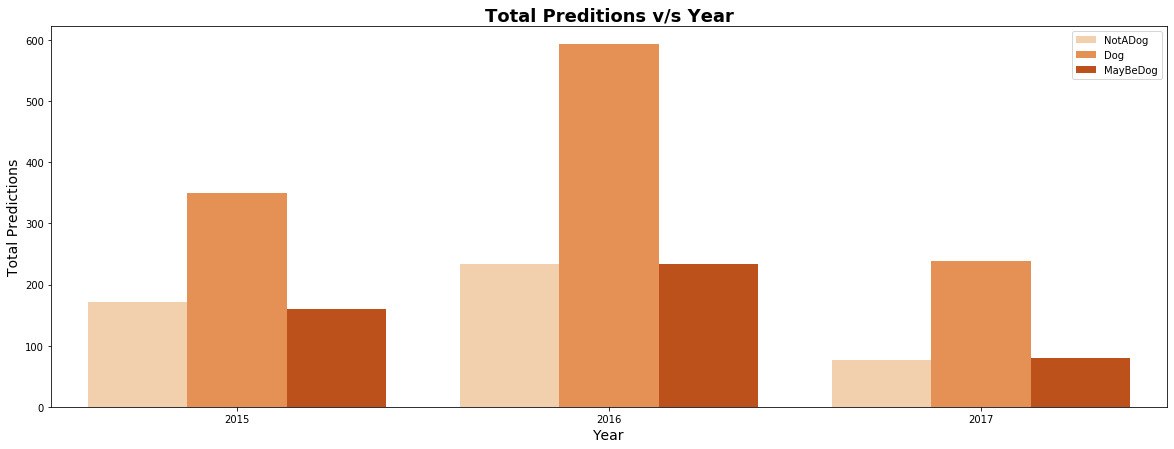

In [259]:
fig = plt.figure(figsize = [20, 7])

sb.countplot(x = 'year' , data = twitter_archive_master, palette='Oranges', hue= 'prediction', orient = 'v')
plt.xlabel( 'Year', fontsize = 14)
plt.ylabel( 'Total Predictions', fontsize = 14)
plt.title( 'Total Preditions v/s Year', fontsize = 18, fontweight="bold")
plt.legend()
print()


#### **Insight & Visualization 2:** Distribution between 'Favorite & Retweet Mean Count' v/s 'Ratings':

> * The ratings were maximum in the range of 1.0 - 1.2
> * The Favorite_count and the Retweet_count increased when the 'Ratings' were higher. An Upward trend can be seen from 1.0 onwards
> * This says that one can expect higher Retweets and Favorite counts when a Higher rating is observed.

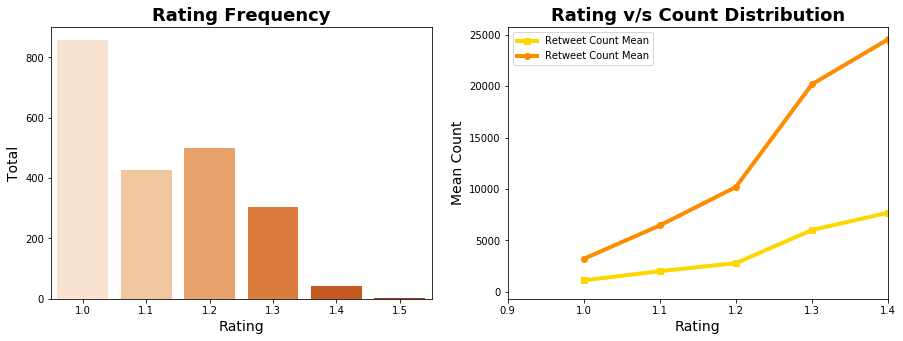

In [262]:
fig = plt.figure(figsize = [15, 30])

## Rating Frequency:

plt.subplot(1, 2, 1)
sb.countplot(x = 'overall_rating' , data = twitter_archive_master, palette='Oranges', orient = 'v')
plt.ylim()
plt.xlabel( 'Rating', fontsize = 14)
plt.ylabel( 'Total', fontsize = 14)
plt.title( 'Rating Frequency', fontsize = 18, fontweight="bold")
print()


## Rating v/s Count Distribution:

plt.subplot(1, 2, 2)
twitter_archive_master.groupby(twitter_archive_master['overall_rating'])['retweet_count'].mean().plot(color = 'gold', 
                                                                                                      linewidth=4,
                                                                                                      marker='s', figsize=(15,5),
                                                                                                      label='Retweet Count Mean')


twitter_archive_master.groupby(twitter_archive_master['overall_rating'])['favorite_count'].mean().plot(color = 'darkorange', 
                                                                                                       linewidth=4,
                                                                                                       marker='o', figsize=(15,5),
                                                                                                       label='Retweet Count Mean')

plt.xlim(-0.1, 1.4)
plt.xlabel( 'Rating', fontsize = 14)
plt.ylabel( 'Mean Count', fontsize = 14)
plt.xlim(0.9, 1.4)
plt.legend()
plt.title( 'Rating v/s Count Distribution', fontsize = 18, fontweight="bold")
print()

#### **Insight & Visualization 3:** Distribution between 'Favorite & Retweet Mean Count' v/s 'Month of the Year':
> * An upward trend can be observed in both, Retweet and the Favorite count
> * Though the trend is more strongly visible in the Favorite Count stats

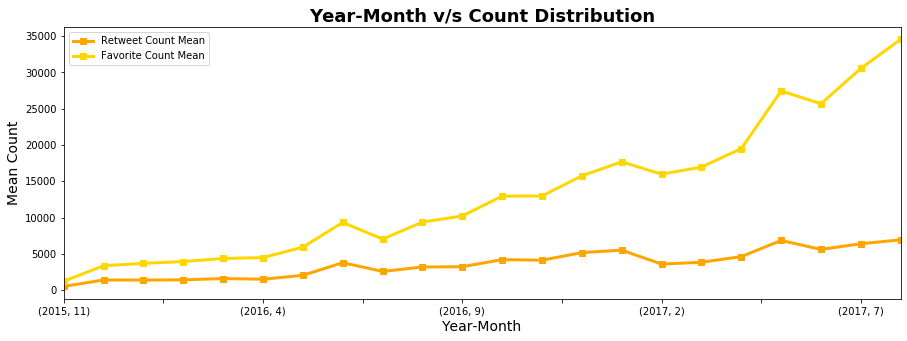

In [263]:
twitter_archive_master.groupby([(twitter_archive_master['year']),
                     (twitter_archive_master['month'])])['retweet_count'].mean().plot(color = 'orange', marker='s',
                                                                                      linewidth=3, figsize=(15,5),
                                                                                      label='Retweet Count Mean')


twitter_archive_master.groupby([(twitter_archive_master['year']),
                     (twitter_archive_master['month'])])['favorite_count'].mean().plot(color = 'gold', marker='s',
                                                                                       linewidth=3, figsize=(15,5),
                                                                                       label='Favorite Count Mean')

plt.xlabel( 'Year-Month', fontsize = 14)
plt.ylabel( 'Mean Count', fontsize = 14)
plt.legend()
plt.title( 'Year-Month v/s Count Distribution', fontsize = 18, fontweight="bold")
print()

#### **Insight & Visualization 4:** Distribution of Top Dog Breed and Names:
> * The graphs provided below are self-explonatory, as the main goal of this visualization was to obtain the most prominent Breed Predicted and the Names of the Dog

Text(0, 0.5, 'Names')

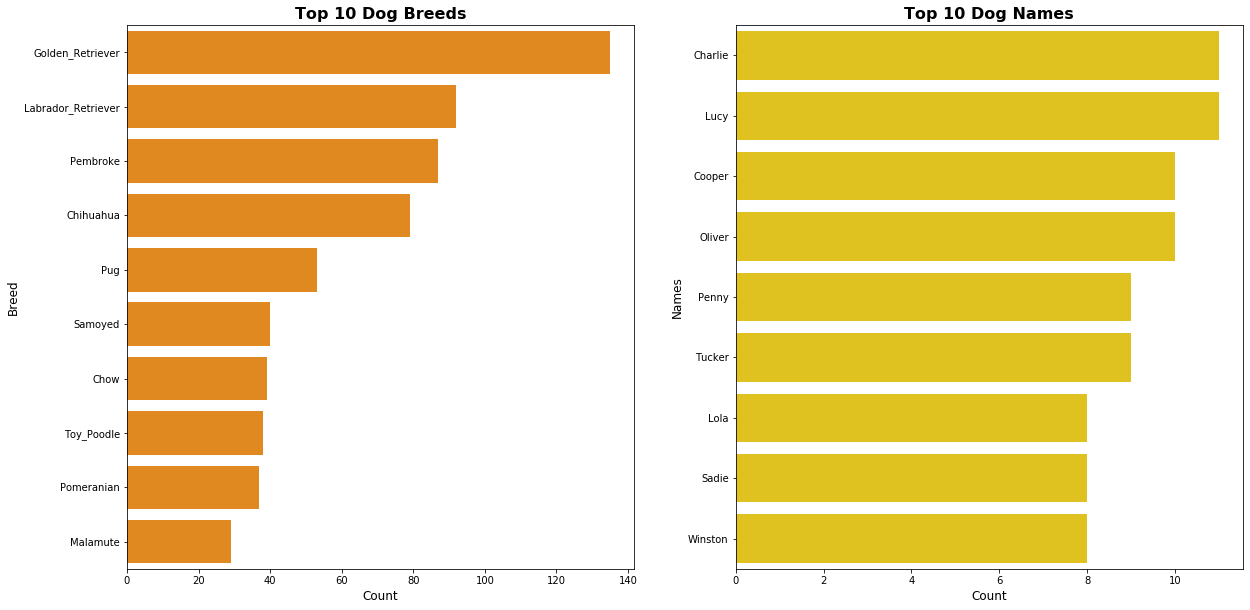

In [264]:
fig = plt.figure(figsize = [20, 10])

## Dog Breed:

plt.subplot(1, 2, 1)
sb.countplot(y = 'p1', data = twitter_archive_master, color = 'darkorange',
             order = twitter_archive_master['p1'].value_counts()[0:10].index, orient = 'v')
plt.title('Top 10 Dog Breeds', size=16, fontweight="bold")
plt.xlabel('Count', size=12)
plt.ylabel('Breed', size=12)


## Dog Name:

plt.subplot(1, 2, 2)
sb.countplot(y = 'name', data = twitter_archive_master, color = 'gold',
             order = twitter_archive_master['name'].value_counts()[1:10].index, orient = 'v')
plt.title('Top 10 Dog Names', size=16, fontweight="bold")
plt.xlabel('Count', size=12)
plt.ylabel('Names', size=12)

#### **Insight & Visualization 5:** Distribution of Stages Frequency of Dogs:
> * Nothing much for the insight. just proving the visual presentation of the data that has been already explored.

Text(0, 0.5, 'Stages')

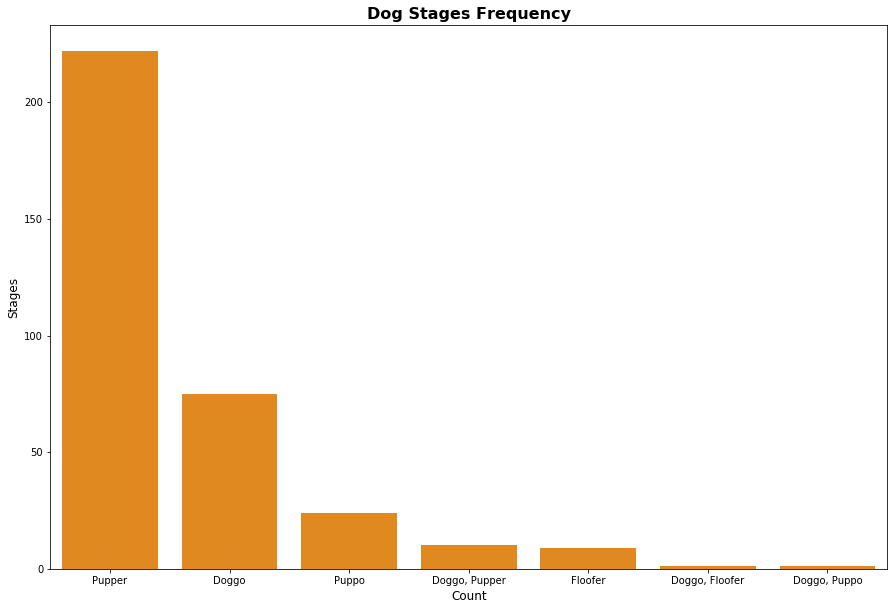

In [284]:
fig = plt.figure(figsize = [15, 10])

dogstage = twitter_archive_master[twitter_archive_master['dog_stages'] != 'None']

sb.countplot(x = 'dog_stages', data = dogstage, color = 'darkorange',
             order = twitter_archive_master['dog_stages'].value_counts()[0:10].index, orient = 'v')
plt.title('Dog Stages Frequency', size=16, fontweight="bold")
plt.xlim(0.5,)
plt.xlabel('Count', size=12)
plt.ylabel('Stages', size=12)